In [6]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import folium as fm
from shapely.geometry import Polygon

from math import radians, asin, sqrt, sin, cos, log, log10

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from collections import Counter

from IPython.core.display import Markdown, display, HTML

In [2]:
# beautify the screen display
%matplotlib inline
pd.options.display.max_columns = 200
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("""<style>
  .rendered_html tr, .rendered_html th,  .rendered_html td {   text-align: right; }  
  .rendered_html :first-child {   text-align: left; } 
  .rendered_html :last-child {   text-align: left; }
  </style>"""))

# Tweak default output of pyplots
screen_dpi = plt.rcParams['figure.dpi']
# 'figsize' is in inches, so convert desired default figure size in pixels into inches using the given sceen dpi 
plt.rcParams["figure.figsize"] = [800/screen_dpi,600/screen_dpi]

In [244]:
# 12-step qualitative color scale, courtesy of www.colorbrewer2.org
# clust_colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
clust_colors = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0']

In [42]:
zones = pd.read_csv('Dataset/Processed/Zone 1-3.csv', index_col='Id')
# zones = zones['Id']
zones.head()

Zone
Id      
30     1
42     1
40     1
43     1
13     1

In [265]:
# comparison = pd.read_csv('Dataset/Processed/hourly_comparison.csv', sep=',', decimal='.', header=0, index_col='id', dtype=np.float64)
comparison = pd.read_csv('Dataset/Processed/hourly_comparison.csv', sep=',', decimal='.', header=0, index_col='id')

comparison = comparison.join(zones, how='inner').drop('Zone', axis=1)

comparison.head()

1         2         3         4         5         6         7  \
1 -0.031963 -0.005128 -0.042945 -0.235294 -0.227273 -0.310345 -0.339286   
2  0.571429  0.621053  0.375000  0.090909  0.120000  0.200000  0.000000   
3 -0.087719 -0.387755 -0.260870 -0.421053 -0.500000 -0.560976 -0.567568   
4  0.574468  0.412844  0.333333  0.296296  0.130435  0.347826  0.282051   
5  0.424658  0.428571  0.380952  0.450000  0.393939  0.428571  0.294118   

          8         9        10        11        12        13        14  \
1 -0.371901 -0.220588 -0.234973 -0.180488 -0.147059 -0.116981 -0.026393   
2 -0.076923  0.234043  0.084746  0.179487  0.320000  0.321429  0.352113   
3 -0.395349 -0.652174 -0.295775 -0.268817 -0.341176 -0.104762 -0.133333   
4  0.173913  0.187500 -0.055556  0.313131  0.462069  0.412935  0.477064   
5  0.245283  0.147541  0.127273  0.097744  0.103448  0.244681  0.196911   

         15        16        17        18        19        20        21  \
1  0.056604  0.000000  0.053191  0.002342 -0.016787  0.020225  0.097046   
2  0.467391  0.388535  0.242105  0.277228  0.192661  0.198473  0.140351   
3 -0.055556  0.014706  0.000000 -0.067568 -0.253521 -0.105590 -0.140351   
4  0.484536  0.432990  0.492386  0.486486  0.366516  0.338521  0.400844   
5  0.232787  0.183521  0.168919  0.256140  0.150000  0.089109 -0.074627   

         22        23        24        25        26        27        28  \
1 -0.051429 -0.028090 -0.042345 -0.082707 -0.079498 -0.184783 -0.226190   
2  0.140097  0.039548  0.161677  0.124183  0.200000 -0.065217 -0.102564   
3 -0.132743 -0.075630 -0.142857 -0.123596 -0.200000 -0.243243 -0.490909   
4  0.257919  0.410138  0.430108  0.358974  0.468531  0.354839  0.370787   
5  0.162011  0.087500  0.200000  0.179104  0.094017  0.120000  0.046512   

         29        30        31        32        33        34        35  \
1 -0.224490 -0.251799 -0.246377 -0.211268 -0.171975 -0.181347 -0.161290   
2 -0.283582 -0.242424 -0.409836 -0.164179 -0.258427 -0.076923 -0.034965   
3 -0.471698 -0.593750 -0.592593 -0.507692 -0.428571 -0.371901 -0.165217   
4  0.348315  0.324324  0.311475  0.314286  0.213483  0.179487  0.355932   
5  0.012658  0.025641  0.063291  0.105882 -0.040000 -0.125828  0.041237   

         36        37        38        39        40        41        42  \
1 -0.078067  0.003390 -0.028249  0.008310  0.025070  0.119318  0.000000   
2  0.041420  0.215686  0.096774  0.180617  0.161538  0.156522  0.039301   
3 -0.028169 -0.051852 -0.006369 -0.102564  0.114943  0.119048 -0.005587   
4  0.333333  0.355932  0.315508  0.383260  0.305936  0.330233  0.292453   
5  0.162304  0.161017  0.179487  0.084848  0.247649  0.244300  0.277978   

         43        44        45        46        47        48        49  \
1  0.051136 -0.075630  0.007673  0.000000 -0.029703 -0.006623  0.078261   
2  0.102881 -0.107692  0.025641 -0.022831 -0.023810  0.022989  0.128834   
3 -0.087500 -0.058824 -0.188406 -0.206349 -0.089109 -0.212766 -0.305263   
4  0.265116  0.333333  0.359649  0.357798  0.401015  0.333333  0.516779   
5  0.273469  0.031111  0.111111  0.091954  0.186207  0.301370  0.295082   

         50        51        52        53        54        55        56  \
1 -0.087912 -0.195122 -0.202614 -0.184615 -0.228346 -0.280000 -0.265625   
2 -0.090909 -0.083333 -0.316456 -0.428571 -0.411765 -0.388889 -0.307692   
3 -0.257143 -0.294118 -0.403509 -0.344262 -0.523810 -0.491525 -0.432836   
4  0.394958  0.358025  0.304348  0.290323  0.225806  0.281250  0.313433   
5  0.303571  0.200000  0.185185  0.180723  0.160494  0.170732  0.093023   

         57        58        59        60        61        62        63  \
1 -0.173913 -0.229947 -0.162393 -0.058333 -0.070922 -0.010381  0.028249   
2 -0.224490 -0.159420 -0.170068 -0.016760  0.064677  0.092308  0.166667   
3 -0.493671 -0.423729 -0.244755 -0.099415  0.029240 -0.034884 -0.116279   
4  0.120879  0.027027  0.112782  0.279503  0.260116  0.242718  0.278539   
5  0.096154  0.042945 -0.03

In [237]:
residents = pd.read_csv('Dataset/Processed/hourly_residents.csv', sep=',', decimal='.', header=0, index_col='id')
residents = residents.join(zones, how='inner').drop('Zone', axis=1)
residents.head()

1   2   3   4   5   6   7   8   9   10   11   12   13   14   15   16  \
1  113  98  85  84  81  76  75  83  83  113  121  156  148  175  175  198   
2   27  18  15  15  11  12  12  14  18   27   32   34   38   46   49   48   
3   31  34  29  27  27  32  29  30  38   46   59   57   58   68   76   67   
4   30  32  24  19  20  15  14  19  26   57   34   39   59   57   50   55   
5   21  16  13  11  10  10  12  20  26   48   60   78   71  104  117  109   

    17   18   19   20   21   22   23   24   25   26   27   28  29  30  31  32  \
1  178  213  212  218  214  184  183  160  144  129  109  103  90  87  86  86   
2   72   73   88  105   98   89   85   70   67   54   49   43  43  41  43  39   
3   69   79   89   89   65   64   64   60   50   48   46   41  39  51  43  49   
4   50   57   70   85   71   82   64   53   50   38   30   28  29  25  21  24   
5  123  106  102   92  108   75   73   60   55   53   44   41  39  38  37  38   

   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47  \
1  92  114  144  145  147  182  179  175  155  190  167  192  194  157  156   
2  56   70   74   81   80   98   93  109   97  110  109  144  114  112   86   
3  55   83   67   73   71   79   86   77   74   90   87   90   82   76   55   
4  35   48   38   50   57   64   70   76   72   75   79   83   73   70   59   
5  52   85   93   80   99  128  151  120  116  100   89  109   96   79   59   

    48   49  50  51  52  53  54  55  56  57   58   59   60   61   62   63  \
1  152  106  99  98  92  77  78  80  81  81  115  136  127  151  146  172   
2   85   71  66  52  52  50  48  50  51  60   80   86   91   94  118  100   
3   57   62  44  44  40  41  48  44  48  59   84   89   94   83   89   96   
4   59   36  36  26  24  22  24  23  23  40   54   59   58   64   78   79   
5   51   43  39  36  33  34  34  34  39  47   78  111  115  116  155  168   

    64   65   66   67   68   69   70   71   72   73   74   75  76  77  78  79  \
1  156  170  188  189  184  201  161  141  152  122  114  104  93  87  83  85   
2  103   93   94  102  112   93   71   42   44   43   34   30  30  29  28  28   
3   74   74   68   88   82   78   58   53   55   47   43   34  34  32  36  35   
4   70   83   69   88   95   79   69   75   65   43   37   26  22  23  23  24   
5  135  135  131  123  111  101  103   77   71   65   49   47  43  44  44  43   

   80  81   82   83   84   85   86   87   88   89   90   91   92   93   94  \
1  85  97  122  153  144  144  176  168  179  161  184  207  204  199  181   
2  28  40   64   51   54   51   60   55   51   49   56   66   63   52   47   
3  40  52   80   71   56   83   81   75   68   67   73   77   75   64   61   
4  22  37   75   48   51   54   68   68   79   62   71   74   77   63   57   
5  49  57   88   98  117  125  128  153  151  141  147  140  121  110  105   

    95   96   97   98   99  100  101  102  103  104  105  106  107  108  109  \
1  166  158  139  116  114  109  105   99   85   98  110  137  145  151  151   
2   45   40   35   28   15   13   12   13   11   10   16   20   25   29   44   
3   62   55   49   47   44   37   41   44   44   42   49   75   61   65   51   
4   66   48   25   24   19   12   11   14    9   17   24   51   51   46   54   
5   82   72   57   50   46   46   46   44   45   45   55   89   97  109  133   

   110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  \
1  162  174  167  184  197  203  184  207  170  157  148  133  123  119  107   
2   41   45   44   43   43   43   48   41   31   32   29   25   17   17   15   
3   61   68   61   44   56   56   57   51   43   40   45   38   30   34   29   
4   46   66   65   57   64   71   65   58   62   54   56   42   23   25   20   
5  138  158  125  130  143  114   96  117   87   63   59   48   37   29   28   

   125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  \
1  104   94   85   91   84   98  107  126  155  174  214  246  257  290  251   
2   13    7   11    9   10   18   18   

In [238]:
visitors = pd.read_csv('Dataset/Processed/hourly_visitors.csv', sep=',', decimal='.', header=0, index_col='id')
visitors = visitors.join(zones, how='inner').drop('Zone', axis=1)
visitors.head()

1   2   3   4   5   6   7   8   9  10  11   12   13   14   15   16   17  \
1  106  97  78  52  51  40  37  38  53  70  84  116  117  166  196  198  198   
2   99  77  33  18  14  18  12  12  29  32  46   66   74   96  135  109  118   
3   26  15  17  11   9   9   8  13   8  25  34   28   47   52   68   69   69   
4  111  77  48  35  26  31  25  27  38  51  65  106  142  161  144  139  147   
5   52  40  29  29  23  25  22  33  35  62  73   96  117  155  188  158  173   

    18   19   20   21   22   23   24   25   26  27  28  29  30  31  32  33  \
1  214  205  227  260  166  173  147  122  110  75  65  57  52  52  56  65   
2  129  130  157  130  118   92   97   86   81  43  35  24  25  18  28  33   
3   69   53   72   49   49   55   45   39   32  28  14  14  13  11  16  22   
4  165  151  172  166  139  153  133  106  105  63  61  60  49  40  46  54   
5  179  138  110   93  104   87   90   79   64  56  45  40  40  42  47  48   

   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48  \
1  79  104  124  148  172  182  184  197  190  185  165  197  157  147  150   
2  60   69   88  124  119  134  151  133  119  134  116  120  107   82   89   
3  38   48   69   64   78   70   97   94   89   73   80   56   50   46   37   
4  69   80  100  120  123  157  143  143  137  136  166  155  148  138  118   
5  66  101  111  137  184  179  199  191  177  156  116  120   95   86   95   

    49  50  51  52  53  54  55  56  57  58   59   60   61   62   63   64   65  \
1  124  83  66  61  53  49  45  47  57  72   98  113  131  143  182  193  218   
2   92  55  44  27  20  20  22  27  38  58   61   88  107  142  140  127  133   
3   33  26  24  17  20  15  15  19  20  34   54   77   88   83   76   65   85   
4  113  83  55  45  40  38  41  44  51  57   74  103  109  128  140  144  133   
5   79  73  54  48  49  47  48  47  57  85  103  106  150  167  202  192  164   

    66   67   68   69   70   71   72   73  74  75  76  77  78  79  80  81  82  \
1  191  192  190  179  152  151  126  129  88  60  48  53  42  41  41  53  86   
2  138  130  143  126  124  101   95   90  66  41  32  18  20  19  19  29  43   
3   72   67   70   56   40   43   32   31  20  18  14  13  15  16  15  18  26   
4  156  129  159  150  160  130  137   94  76  53  51  37  39  34  38  45  52   
5  184  161  110  120  106   95   89   70  59  46  44  45  43  45  43  52  75   

    83   84   85   86   87   88   89   90   91   92   93   94   95   96   97  \
1  103  128  160  193  198  205  206  218  234  231  214  182  159  141  118   
2   52   73   94   93  103  110  104  109  104  115  106  104   97   94   79   
3   47   42   75   62   70   76   65   46   61   46   53   28   32   32   23   
4   65  102  121  129  124  144  143  140  130  152  155  136  125  114   98   
5   98  112  147  202  216  190  214  195  173  118  131  119  113   96   96   

   98  99  100  101  102  103  104  105  106  107  108  109  110  111  112  \
1  94  79   67   59   54   57   56   65   87  111  136  170  195  224  207   
2  65  43   23   15   15   11   26   20   43   47   71   98   97  107  125   
3  15   8    5    7    6    4    6    9   23   36   43   49   56   78   46   
4  77  49   40   34   33   33   32   43   64   63   81  112  132  155  157   
5  68  53   51   47   44   48   50   53   74   94  113  169  193  202  189   

   113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  \
1  225  222  202  231  226  190  176  167  145  108   87   74   59   54   48   
2  112  114   91  101   99   94   99   98   77   56   33   30   21   10   10   
3   57   57   53   36   33   29   28   22   25   14   11   15    9    6    5   
4  167  171  167  155  139  150  160  152   94   84   51   47   37   35   30   
5  186  180  173  163  148  126  126   92   85   67   56   47   45   42   39   

   128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  \
1   51   60   90  133  171  224  270  329  338  348  333  273  261  252  212   
2   18   24   3

In [7]:
division_geo = gpd.read_file('Dataset/Processed/London_division.shp', driver="ESRI Shapefile")
division_geo.head()

id               name      area  \
0   1   Trafalgar Square  0.277425   
1   2            Big Ben  0.399994   
2   3  Parliament Square  0.236767   
3   4         London Eye  0.425408   
4   5        Tate Modern  0.686323   

                                            geometry  
0  POLYGON ((-0.1304619 51.50952, -0.12742117 51....  
1  POLYGON ((-0.12498988 51.503284, -0.12284501 5...  
2  POLYGON ((-0.12562872 51.502274, -0.124708146 ...  
3  POLYGON ((-0.12235283 51.503895, -0.119325526 ...  
4  POLYGON ((-0.0996684 51.51117, -0.095774494 51...

In [189]:
interval_median_comparison = comparison.median(skipna=True)
interval_median_residents = residents.median(skipna=True)
interval_median_visitors = visitors.median(skipna=True)


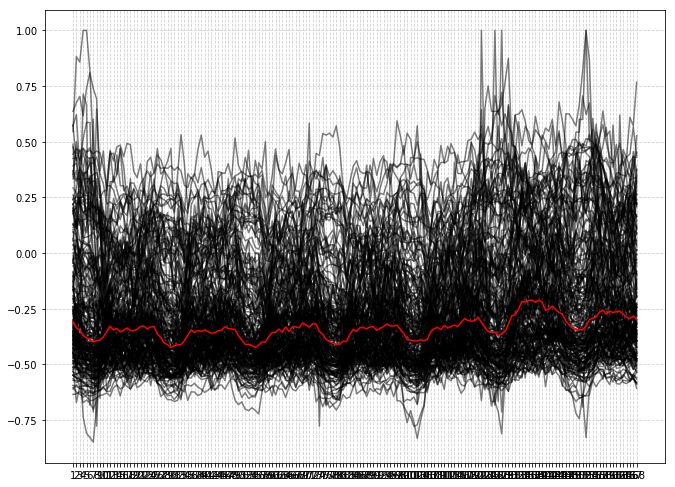

In [190]:
fig, ax = plt.subplots()

for index, row in comparison.iterrows():
    ax.plot(comparison.columns, row, color='#00000080', label=row.name)

ax.plot(comparison.columns, interval_median_comparison, color='red')

ax.yaxis.grid(color='#D0D0D0', linestyle='--')

ax.set_xticks(comparison.columns)
#for tick in ax.get_xticklabels():
#    tick.set_rotation(45)
    
ax.xaxis.grid(color='#D0D0D0', linestyle='--')

plt.show()

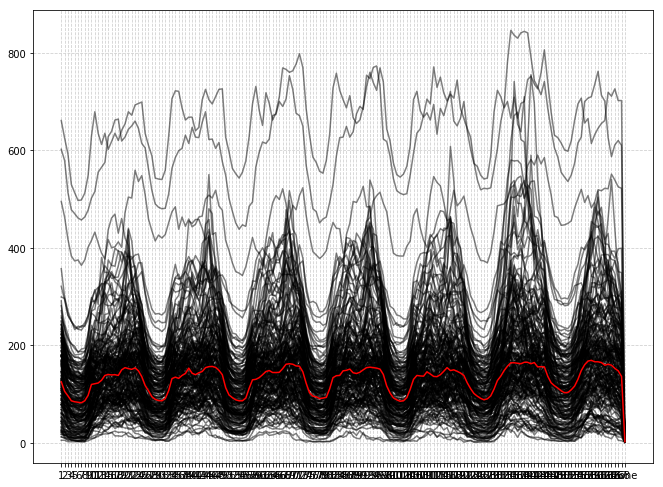

In [58]:
fig, ax = plt.subplots()

for index, row in visitors.iterrows():
    ax.plot(visitors.columns, row, color='#00000080', label=row.name)

ax.plot(visitors.columns, interval_median_visitors, color='red')

ax.yaxis.grid(color='#D0D0D0', linestyle='--')

ax.set_xticks(visitors.columns)
#for tick in ax.get_xticklabels():
#    tick.set_rotation(45)
    
ax.xaxis.grid(color='#D0D0D0', linestyle='--')

plt.show()

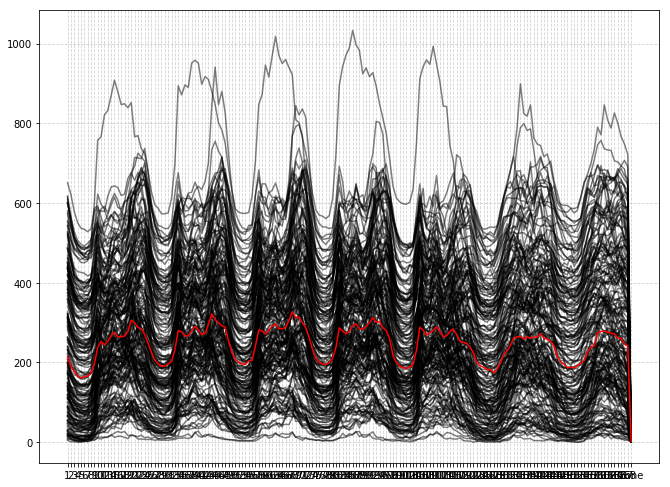

In [59]:
fig, ax = plt.subplots()

for index, row in residents.iterrows():
    ax.plot(residents.columns, row, color='#00000080', label=row.name)

ax.plot(residents.columns, interval_median_residents, color='red')

ax.yaxis.grid(color='#D0D0D0', linestyle='--')

ax.set_xticks(residents.columns)
#for tick in ax.get_xticklabels():
#    tick.set_rotation(45)
    
ax.xaxis.grid(color='#D0D0D0', linestyle='--')

plt.show()

In [131]:
mod_steps = 167

def uncluterred_plot(time_series):
    interval_min = time_series.min(skipna=True)
    interval_max = time_series.max(skipna=True)
    interval_mean = time_series.mean(skipna=True)
    interval_median = time_series.median(skipna=True)

    quantile_borders = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    int_quantiles = time_series.quantile(quantile_borders).T

    quant_color_dark  = '#B0B0B0FF'
    quant_color_light = '#F0F0F0FF'
    quant_range_colors = [quant_color_light, quant_color_dark]

    fig, axs = plt.subplots(1, 2, figsize=(1200/screen_dpi,400/screen_dpi))

    ###### First (left) subplot
    ax = axs[0]
    for i in range(1, len(quantile_borders)):
        ax.fill_between(int_quantiles.index, int_quantiles[quantile_borders[i-1]], int_quantiles[quantile_borders[i]], facecolor=quant_range_colors[i%2])

    ax.plot(interval_min.index, interval_min, color=quant_color_dark)
    ax.plot(interval_max.index, interval_max, color=quant_color_dark)

    legend_handles = [None, None] # Manually collect relevant legend handles, so we can suppress that every single (auto-labeled) decentile element gets crammed into the legend
    legend_handles[0], = ax.plot(interval_mean.index, interval_mean, color='blue')
    legend_handles[1], = ax.plot(interval_median.index, interval_median, color='red')

    # Draw a subtle reference grid
    ax.yaxis.grid(color='#D0D0D0', linestyle='--')
    ax.xaxis.grid(color='#D0D0D0', linestyle='--')

    # X-axis tick labels might need a little bit of help to look nicely
    ax.set_xticks(int_quantiles.index)
    #for i, tick in enumerate(ax.get_xticklabels()):
    #    tick.set_label(str(int_quantiles.index))
    #    tick.set_rotation(45)

    ax.set_title('Per-cell time series')

    ax.set_xlim(0, mod_steps)
    ax.set_ylim(0)

    ###### Second (right) subplot
    ax = axs[1]
    for i in range(1, len(quantile_borders)):
        ax.fill_between(int_quantiles.index, int_quantiles[quantile_borders[i-1]], int_quantiles[quantile_borders[i]], facecolor=quant_range_colors[i%2])

    ax.plot(interval_min.index, interval_min, color=quant_color_dark)
    ax.plot(interval_max.index, interval_max, color=quant_color_dark)

    legend_handles = [None, None] # Manually collect relevant legend handles, so we can suppress that every single (auto-labeled) decentile element gets crammed into the legend
    legend_handles[0], = ax.plot(interval_mean.index, interval_mean, color='blue')
    legend_handles[1], = ax.plot(interval_median.index, interval_median, color='red')

    # Draw a subtle reference grid
    ax.yaxis.grid(color='#D0D0D0', linestyle='--')
    ax.xaxis.grid(color='#D0D0D0', linestyle='--')

    # X-axis tick labels might need a little bit of help to look nicely
    ax.set_xticks(int_quantiles.index)
    #for i, tick in enumerate(ax.get_xticklabels()):
    #    tick.set_label(str(int_quantiles.index))
    #    tick.set_rotation(45)

    ax.set_title('Low-value range details')

    ax.set_xlim(0, mod_steps)
    # Zoom the plot on the low values range for more details
    ax.set_ylim(0, 100)

    ###### Joint legend
    labels = ['Mean', 'Median']
    ax.legend(handles=legend_handles, title='Reference Time Series', labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

    plt.show()

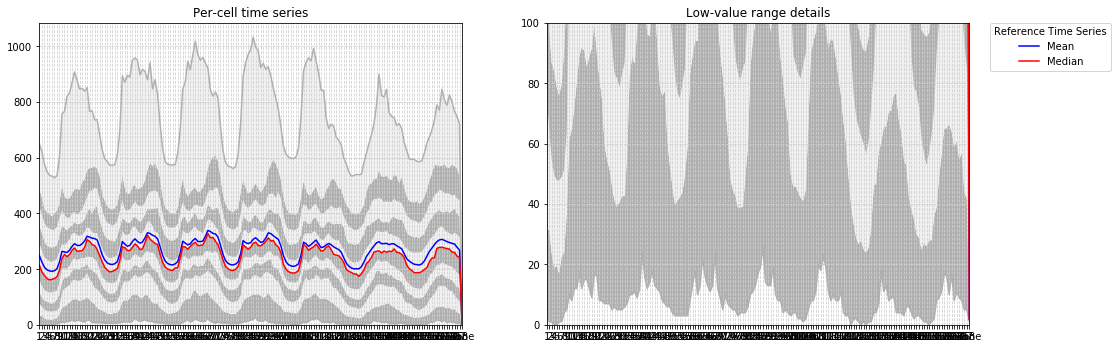

In [60]:
uncluterred_plot(residents)

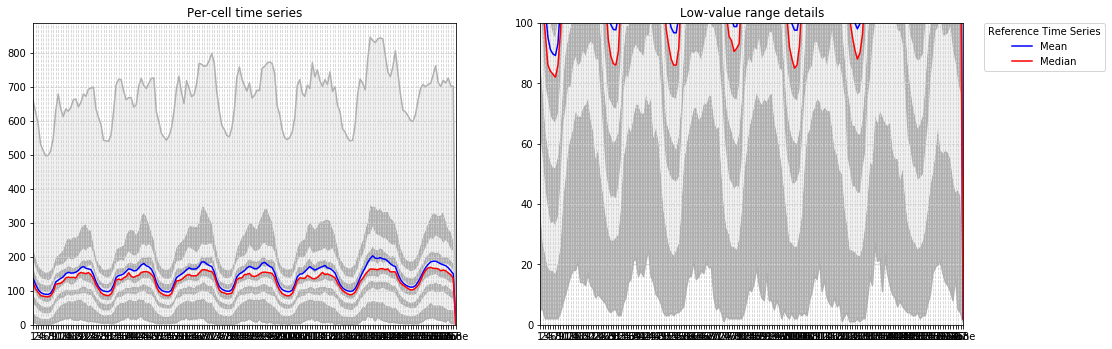

In [61]:
uncluterred_plot(visitors)

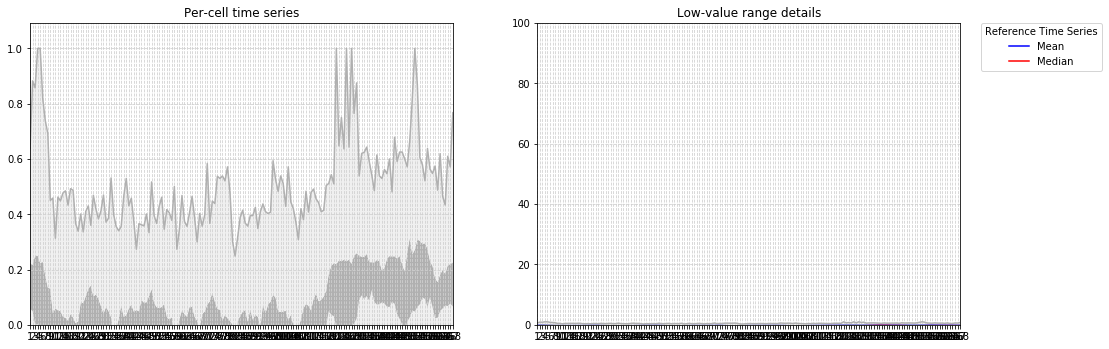

In [191]:
uncluterred_plot(comparison)

In [232]:
k = 5 # 12 is tthe upper limit for k, as ColorBrewer's color scale has 12 colors only.

# clust_id_col_name = 'Cluster ID (k={})'.format(k)
clust_id_col_name = 'Cluster ID'

# time_series.head()

In [266]:
def clusterize(series):    
    kmeans = KMeans(n_clusters=k, random_state=42)
    clus = kmeans.fit(series)
#     clus = kmeans.fit(series.drop([clust_id_col_name], axis=1))
    clustered_series = series.copy()
    clustered_series[clust_id_col_name] = clus.labels_
    
#     centroids = pd.DataFrame(data=clus.cluster_centers_, columns=series.drop([clust_id_col_name], axis=1).columns)
#     print(series.drop([clust_id_col_name], axis=1).columns)
    centroids = pd.DataFrame(data=clus.cluster_centers_, columns=series.columns)
    cluster_sizes = Counter(clus.labels_)
    for cid, cnt in cluster_sizes.items():
        cluster_sizes[cid] = (cnt, log10(cnt) + 1)

    return (clustered_series, centroids, cluster_sizes)

In [147]:
# cluster_sizes = Counter(clus.labels_)
# for cid, cnt in cluster_sizes.items():
#     cluster_sizes[cid] = (cnt, log10(cnt) + 1)

In [239]:
(residents, residents_centroids, residents_cluster_sizes) = clusterize(residents)
residents.to_csv('Dataset/clustered_residents.csv', index_label='id')
residents.head()

1   2   3   4   5   6   7   8   9   10   11   12   13   14   15   16  \
1  113  98  85  84  81  76  75  83  83  113  121  156  148  175  175  198   
2   27  18  15  15  11  12  12  14  18   27   32   34   38   46   49   48   
3   31  34  29  27  27  32  29  30  38   46   59   57   58   68   76   67   
4   30  32  24  19  20  15  14  19  26   57   34   39   59   57   50   55   
5   21  16  13  11  10  10  12  20  26   48   60   78   71  104  117  109   

    17   18   19   20   21   22   23   24   25   26   27   28  29  30  31  32  \
1  178  213  212  218  214  184  183  160  144  129  109  103  90  87  86  86   
2   72   73   88  105   98   89   85   70   67   54   49   43  43  41  43  39   
3   69   79   89   89   65   64   64   60   50   48   46   41  39  51  43  49   
4   50   57   70   85   71   82   64   53   50   38   30   28  29  25  21  24   
5  123  106  102   92  108   75   73   60   55   53   44   41  39  38  37  38   

   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47  \
1  92  114  144  145  147  182  179  175  155  190  167  192  194  157  156   
2  56   70   74   81   80   98   93  109   97  110  109  144  114  112   86   
3  55   83   67   73   71   79   86   77   74   90   87   90   82   76   55   
4  35   48   38   50   57   64   70   76   72   75   79   83   73   70   59   
5  52   85   93   80   99  128  151  120  116  100   89  109   96   79   59   

    48   49  50  51  52  53  54  55  56  57   58   59   60   61   62   63  \
1  152  106  99  98  92  77  78  80  81  81  115  136  127  151  146  172   
2   85   71  66  52  52  50  48  50  51  60   80   86   91   94  118  100   
3   57   62  44  44  40  41  48  44  48  59   84   89   94   83   89   96   
4   59   36  36  26  24  22  24  23  23  40   54   59   58   64   78   79   
5   51   43  39  36  33  34  34  34  39  47   78  111  115  116  155  168   

    64   65   66   67   68   69   70   71   72   73   74   75  76  77  78  79  \
1  156  170  188  189  184  201  161  141  152  122  114  104  93  87  83  85   
2  103   93   94  102  112   93   71   42   44   43   34   30  30  29  28  28   
3   74   74   68   88   82   78   58   53   55   47   43   34  34  32  36  35   
4   70   83   69   88   95   79   69   75   65   43   37   26  22  23  23  24   
5  135  135  131  123  111  101  103   77   71   65   49   47  43  44  44  43   

   80  81   82   83   84   85   86   87   88   89   90   91   92   93   94  \
1  85  97  122  153  144  144  176  168  179  161  184  207  204  199  181   
2  28  40   64   51   54   51   60   55   51   49   56   66   63   52   47   
3  40  52   80   71   56   83   81   75   68   67   73   77   75   64   61   
4  22  37   75   48   51   54   68   68   79   62   71   74   77   63   57   
5  49  57   88   98  117  125  128  153  151  141  147  140  121  110  105   

    95   96   97   98   99  100  101  102  103  104  105  106  107  108  109  \
1  166  158  139  116  114  109  105   99   85   98  110  137  145  151  151   
2   45   40   35   28   15   13   12   13   11   10   16   20   25   29   44   
3   62   55   49   47   44   37   41   44   44   42   49   75   61   65   51   
4   66   48   25   24   19   12   11   14    9   17   24   51   51   46   54   
5   82   72   57   50   46   46   46   44   45   45   55   89   97  109  133   

   110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  \
1  162  174  167  184  197  203  184  207  170  157  148  133  123  119  107   
2   41   45   44   43   43   43   48   41   31   32   29   25   17   17   15   
3   61   68   61   44   56   56   57   51   43   40   45   38   30   34   29   
4   46   66   65   57   64   71   65   58   62   54   56   42   23   25   20   
5  138  158  125  130  143  114   96  117   87   63   59   48   37   29   28   

   125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  \
1  104   94   85   91   84   98  107  126  155  174  214  246  257  290  251   
2   13    7   11    9   10   18   18   

In [240]:
(visitors, visitor_centroids, visitor_cluster_sizes) = clusterize(visitors)
visitors.to_csv('Dataset/clustered_visitors.csv', index_label='id')
visitors.head()

1   2   3   4   5   6   7   8   9  10  11   12   13   14   15   16   17  \
1  106  97  78  52  51  40  37  38  53  70  84  116  117  166  196  198  198   
2   99  77  33  18  14  18  12  12  29  32  46   66   74   96  135  109  118   
3   26  15  17  11   9   9   8  13   8  25  34   28   47   52   68   69   69   
4  111  77  48  35  26  31  25  27  38  51  65  106  142  161  144  139  147   
5   52  40  29  29  23  25  22  33  35  62  73   96  117  155  188  158  173   

    18   19   20   21   22   23   24   25   26  27  28  29  30  31  32  33  \
1  214  205  227  260  166  173  147  122  110  75  65  57  52  52  56  65   
2  129  130  157  130  118   92   97   86   81  43  35  24  25  18  28  33   
3   69   53   72   49   49   55   45   39   32  28  14  14  13  11  16  22   
4  165  151  172  166  139  153  133  106  105  63  61  60  49  40  46  54   
5  179  138  110   93  104   87   90   79   64  56  45  40  40  42  47  48   

   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48  \
1  79  104  124  148  172  182  184  197  190  185  165  197  157  147  150   
2  60   69   88  124  119  134  151  133  119  134  116  120  107   82   89   
3  38   48   69   64   78   70   97   94   89   73   80   56   50   46   37   
4  69   80  100  120  123  157  143  143  137  136  166  155  148  138  118   
5  66  101  111  137  184  179  199  191  177  156  116  120   95   86   95   

    49  50  51  52  53  54  55  56  57  58   59   60   61   62   63   64   65  \
1  124  83  66  61  53  49  45  47  57  72   98  113  131  143  182  193  218   
2   92  55  44  27  20  20  22  27  38  58   61   88  107  142  140  127  133   
3   33  26  24  17  20  15  15  19  20  34   54   77   88   83   76   65   85   
4  113  83  55  45  40  38  41  44  51  57   74  103  109  128  140  144  133   
5   79  73  54  48  49  47  48  47  57  85  103  106  150  167  202  192  164   

    66   67   68   69   70   71   72   73  74  75  76  77  78  79  80  81  82  \
1  191  192  190  179  152  151  126  129  88  60  48  53  42  41  41  53  86   
2  138  130  143  126  124  101   95   90  66  41  32  18  20  19  19  29  43   
3   72   67   70   56   40   43   32   31  20  18  14  13  15  16  15  18  26   
4  156  129  159  150  160  130  137   94  76  53  51  37  39  34  38  45  52   
5  184  161  110  120  106   95   89   70  59  46  44  45  43  45  43  52  75   

    83   84   85   86   87   88   89   90   91   92   93   94   95   96   97  \
1  103  128  160  193  198  205  206  218  234  231  214  182  159  141  118   
2   52   73   94   93  103  110  104  109  104  115  106  104   97   94   79   
3   47   42   75   62   70   76   65   46   61   46   53   28   32   32   23   
4   65  102  121  129  124  144  143  140  130  152  155  136  125  114   98   
5   98  112  147  202  216  190  214  195  173  118  131  119  113   96   96   

   98  99  100  101  102  103  104  105  106  107  108  109  110  111  112  \
1  94  79   67   59   54   57   56   65   87  111  136  170  195  224  207   
2  65  43   23   15   15   11   26   20   43   47   71   98   97  107  125   
3  15   8    5    7    6    4    6    9   23   36   43   49   56   78   46   
4  77  49   40   34   33   33   32   43   64   63   81  112  132  155  157   
5  68  53   51   47   44   48   50   53   74   94  113  169  193  202  189   

   113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  \
1  225  222  202  231  226  190  176  167  145  108   87   74   59   54   48   
2  112  114   91  101   99   94   99   98   77   56   33   30   21   10   10   
3   57   57   53   36   33   29   28   22   25   14   11   15    9    6    5   
4  167  171  167  155  139  150  160  152   94   84   51   47   37   35   30   
5  186  180  173  163  148  126  126   92   85   67   56   47   45   42   39   

   128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  \
1   51   60   90  133  171  224  270  329  338  348  333  273  261  252  212   
2   18   24   3

In [269]:
# comparison = comparison.drop([clust_id_col_name], axis=1)
(comparison_clustered, comparison_centroids, comparison_cluster_sizes) = clusterize(comparison)
comparison_clustered.to_csv('Dataset/clustered_comparison_1.csv', index_label='id')
comparison_clustered.head()

1         2         3         4         5         6         7  \
1 -0.031963 -0.005128 -0.042945 -0.235294 -0.227273 -0.310345 -0.339286   
2  0.571429  0.621053  0.375000  0.090909  0.120000  0.200000  0.000000   
3 -0.087719 -0.387755 -0.260870 -0.421053 -0.500000 -0.560976 -0.567568   
4  0.574468  0.412844  0.333333  0.296296  0.130435  0.347826  0.282051   
5  0.424658  0.428571  0.380952  0.450000  0.393939  0.428571  0.294118   

          8         9        10        11        12        13        14  \
1 -0.371901 -0.220588 -0.234973 -0.180488 -0.147059 -0.116981 -0.026393   
2 -0.076923  0.234043  0.084746  0.179487  0.320000  0.321429  0.352113   
3 -0.395349 -0.652174 -0.295775 -0.268817 -0.341176 -0.104762 -0.133333   
4  0.173913  0.187500 -0.055556  0.313131  0.462069  0.412935  0.477064   
5  0.245283  0.147541  0.127273  0.097744  0.103448  0.244681  0.196911   

         15        16        17        18        19        20        21  \
1  0.056604  0.000000  0.053191  0.002342 -0.016787  0.020225  0.097046   
2  0.467391  0.388535  0.242105  0.277228  0.192661  0.198473  0.140351   
3 -0.055556  0.014706  0.000000 -0.067568 -0.253521 -0.105590 -0.140351   
4  0.484536  0.432990  0.492386  0.486486  0.366516  0.338521  0.400844   
5  0.232787  0.183521  0.168919  0.256140  0.150000  0.089109 -0.074627   

         22        23        24        25        26        27        28  \
1 -0.051429 -0.028090 -0.042345 -0.082707 -0.079498 -0.184783 -0.226190   
2  0.140097  0.039548  0.161677  0.124183  0.200000 -0.065217 -0.102564   
3 -0.132743 -0.075630 -0.142857 -0.123596 -0.200000 -0.243243 -0.490909   
4  0.257919  0.410138  0.430108  0.358974  0.468531  0.354839  0.370787   
5  0.162011  0.087500  0.200000  0.179104  0.094017  0.120000  0.046512   

         29        30        31        32        33        34        35  \
1 -0.224490 -0.251799 -0.246377 -0.211268 -0.171975 -0.181347 -0.161290   
2 -0.283582 -0.242424 -0.409836 -0.164179 -0.258427 -0.076923 -0.034965   
3 -0.471698 -0.593750 -0.592593 -0.507692 -0.428571 -0.371901 -0.165217   
4  0.348315  0.324324  0.311475  0.314286  0.213483  0.179487  0.355932   
5  0.012658  0.025641  0.063291  0.105882 -0.040000 -0.125828  0.041237   

         36        37        38        39        40        41        42  \
1 -0.078067  0.003390 -0.028249  0.008310  0.025070  0.119318  0.000000   
2  0.041420  0.215686  0.096774  0.180617  0.161538  0.156522  0.039301   
3 -0.028169 -0.051852 -0.006369 -0.102564  0.114943  0.119048 -0.005587   
4  0.333333  0.355932  0.315508  0.383260  0.305936  0.330233  0.292453   
5  0.162304  0.161017  0.179487  0.084848  0.247649  0.244300  0.277978   

         43        44        45        46        47        48        49  \
1  0.051136 -0.075630  0.007673  0.000000 -0.029703 -0.006623  0.078261   
2  0.102881 -0.107692  0.025641 -0.022831 -0.023810  0.022989  0.128834   
3 -0.087500 -0.058824 -0.188406 -0.206349 -0.089109 -0.212766 -0.305263   
4  0.265116  0.333333  0.359649  0.357798  0.401015  0.333333  0.516779   
5  0.273469  0.031111  0.111111  0.091954  0.186207  0.301370  0.295082   

         50        51        52        53        54        55        56  \
1 -0.087912 -0.195122 -0.202614 -0.184615 -0.228346 -0.280000 -0.265625   
2 -0.090909 -0.083333 -0.316456 -0.428571 -0.411765 -0.388889 -0.307692   
3 -0.257143 -0.294118 -0.403509 -0.344262 -0.523810 -0.491525 -0.432836   
4  0.394958  0.358025  0.304348  0.290323  0.225806  0.281250  0.313433   
5  0.303571  0.200000  0.185185  0.180723  0.160494  0.170732  0.093023   

         57        58        59        60        61        62        63  \
1 -0.173913 -0.229947 -0.162393 -0.058333 -0.070922 -0.010381  0.028249   
2 -0.224490 -0.159420 -0.170068 -0.016760  0.064677  0.092308  0.166667   
3 -0.493671 -0.423729 -0.244755 -0.099415  0.029240 -0.034884 -0.116279   
4  0.120879  0.027027  0.112782  0.279503  0.260116  0.242718  0.278539   
5  0.096154  0.042945 -0.03

In [278]:
def plot_clusters(time_series, centroids, cluster_sizes, selected_clusters=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(1200/screen_dpi, 900/screen_dpi)

    # Select subset of clusters for detail comparison
    #selected_clusters = [0, 3, 5]
    # or use the next statement to display all clusters simultaneously
    if (selected_clusters is None):
        selected_clusters = [x for x in range(k)]

    x_vals = [x for x in range(mod_steps+1)]
    for index, row in time_series.iterrows():
        cluster_id = row[mod_steps+1]
        if (cluster_id < k and cluster_id in selected_clusters):
#             print(len(row))
#             print(clust_colors)
#             print(int(cluster_id))
#             print(clust_colors[int(cluster_id)])
#             ax.plot(x_vals, row[0:mod_steps+1], color=clust_colors[int(cluster_id)], alpha= 0.1, label=index)
            ax.plot(x_vals, row[0:mod_steps+1], color=clust_colors[int(cluster_id)-1], alpha= 0.2, label=index)

    legend_handles = [] # Manually collect relevant legend handles, so we can suppress that every single cell's label gets crammed into the legend
    for cluster_id, centroid in centroids.iterrows():
        if (cluster_id in selected_clusters):
            centroid_handle, = ax.plot(centroid.index, centroid, color=clust_colors[int(cluster_id)-1], alpha= 1.0, linewidth=2, label=cluster_id)
            legend_handles.append(centroid_handle)

#     ax.set_ylabel(target_col)
    ax.set_ylabel('Count')
    ax.yaxis.grid(color='#D0D0D0', linestyle='--')
    ax.xaxis.grid(color='#D0D0D0', linestyle='--')
    ax.set_xticks(x_vals[::12])

#     ax.set_ylim(0, max_val)

    plt.title('Temporal Cluster Variance')

    labels = [None] * len(selected_clusters)
    for i, cid in enumerate(selected_clusters):
        labels[i] = '{:>2} ({:>4})'.format(cid, cluster_sizes[cid][0])

    plt.legend(handles=legend_handles, title='Cluster ID (Cluster size)', labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

    plt.show()

TypeError: 'int' object is not subscriptable

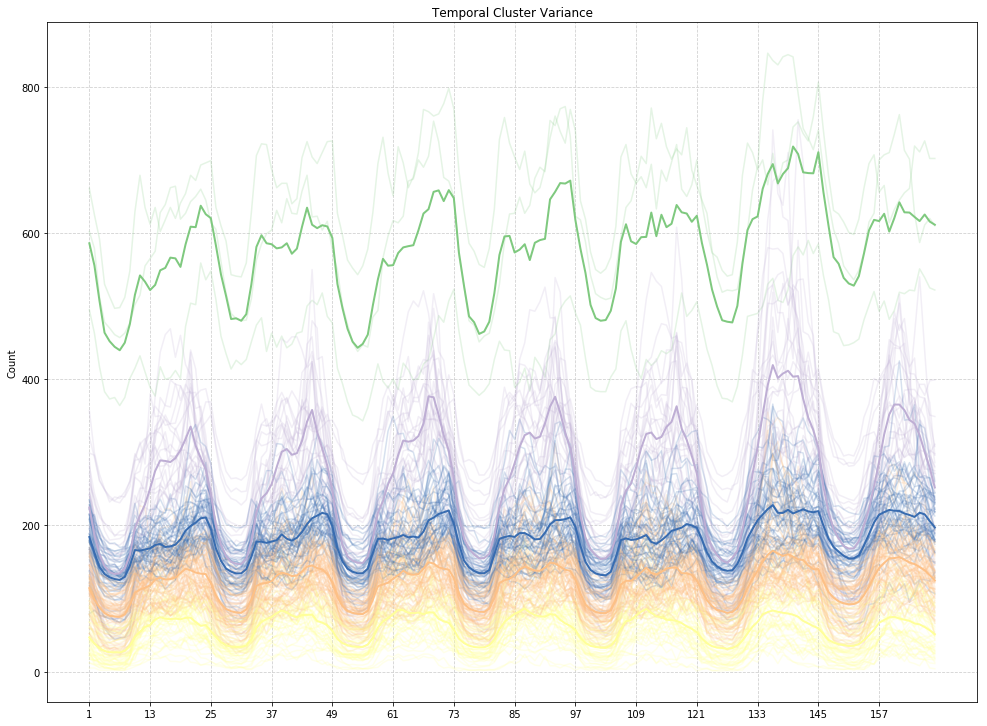

In [279]:
plot_clusters(visitors, visitor_centroids, visitor_cluster_sizes)

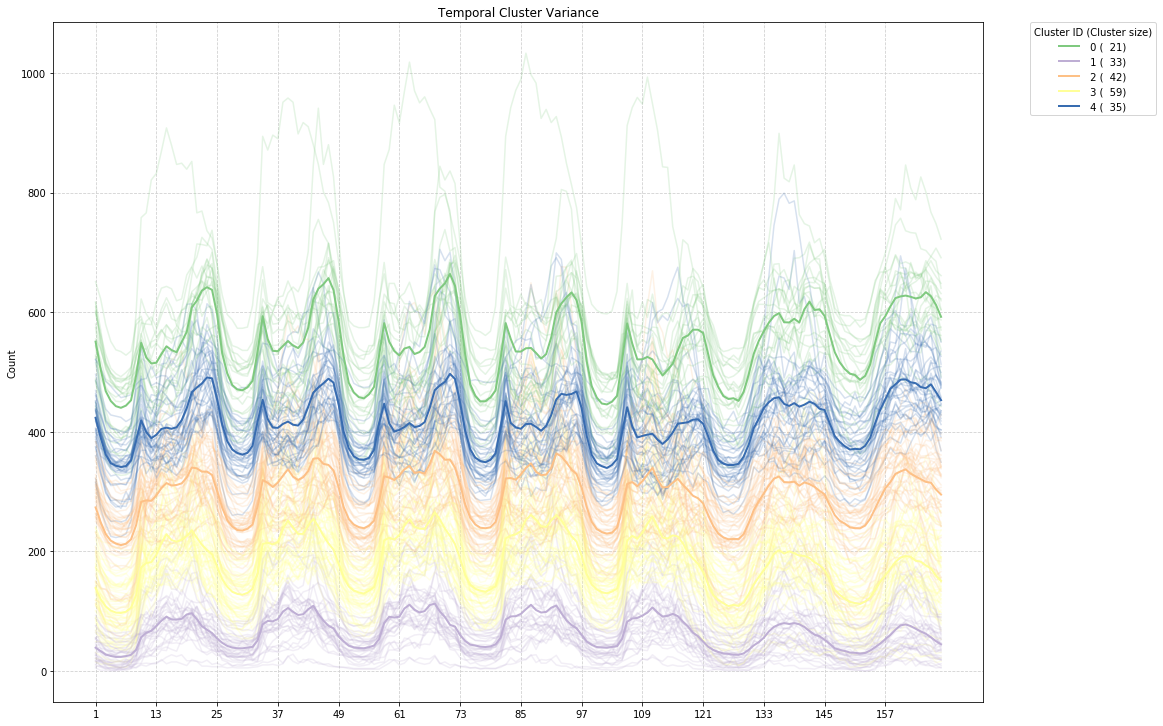

In [256]:
plot_clusters(residents, residents_centroids, residents_cluster_sizes)

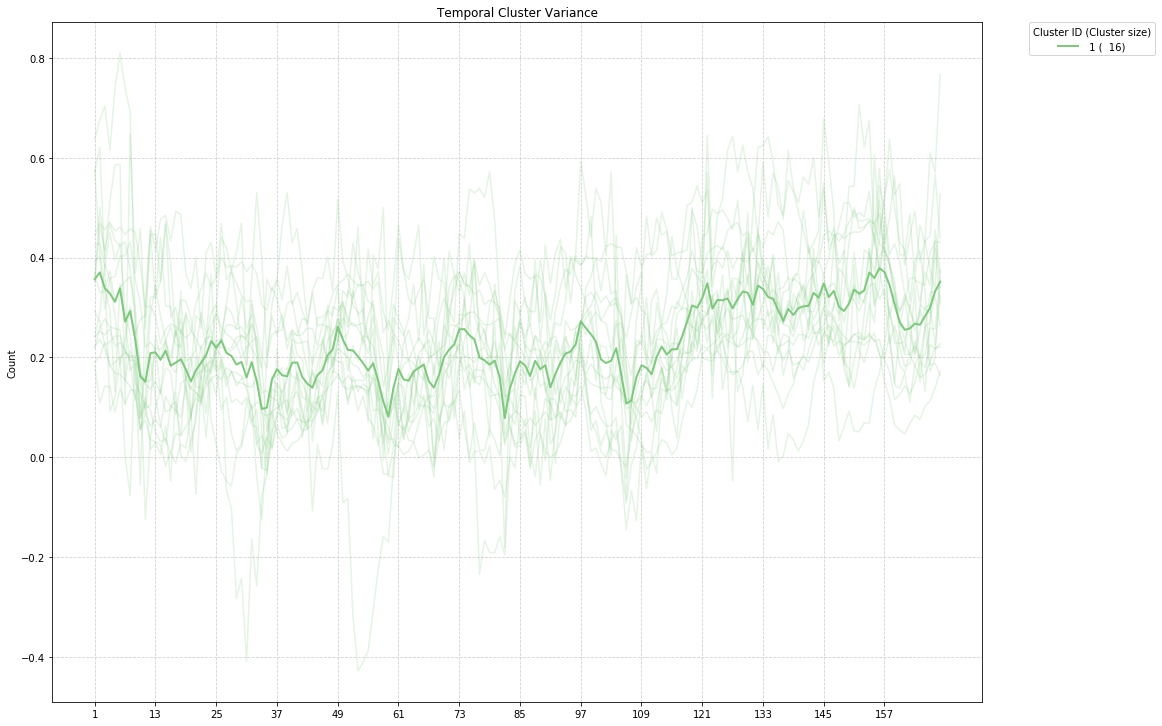

In [281]:
plot_clusters(comparison_clustered, comparison_centroids, comparison_cluster_sizes, [1])

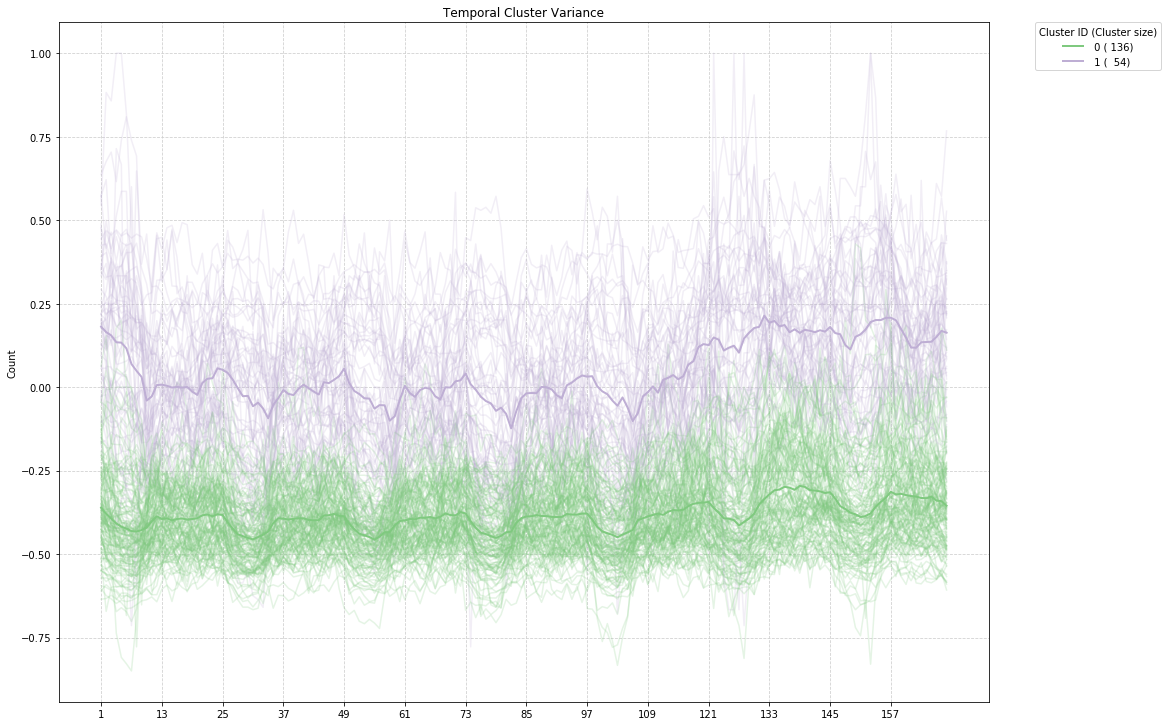

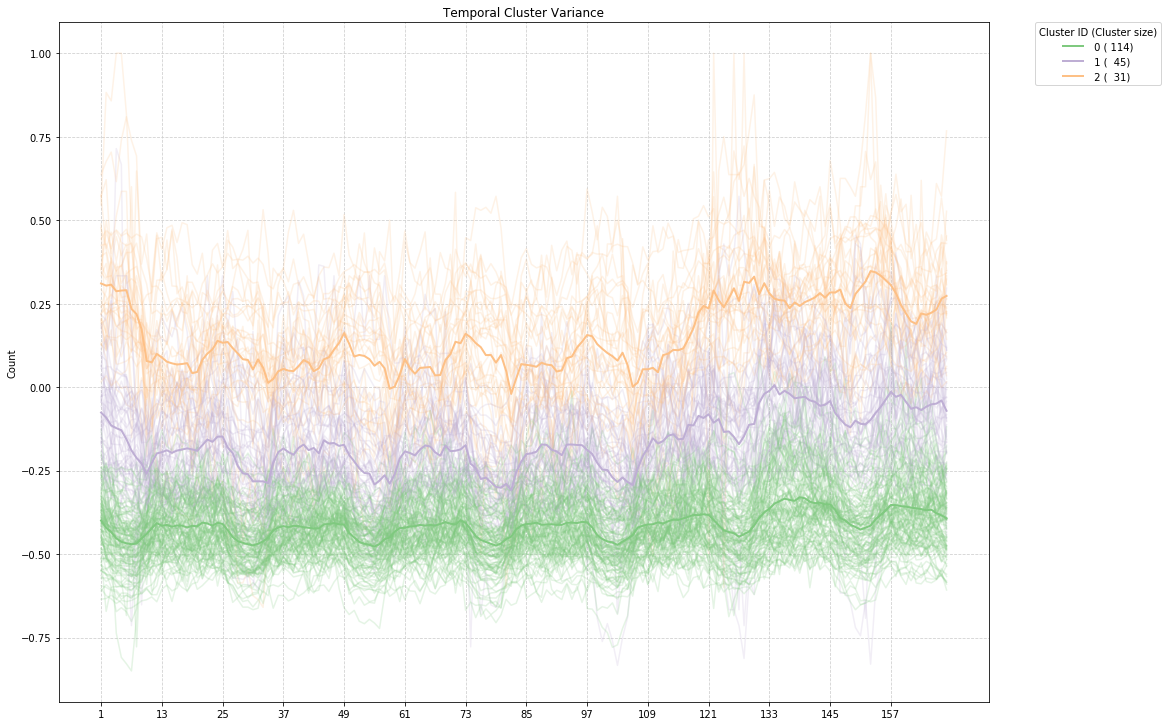

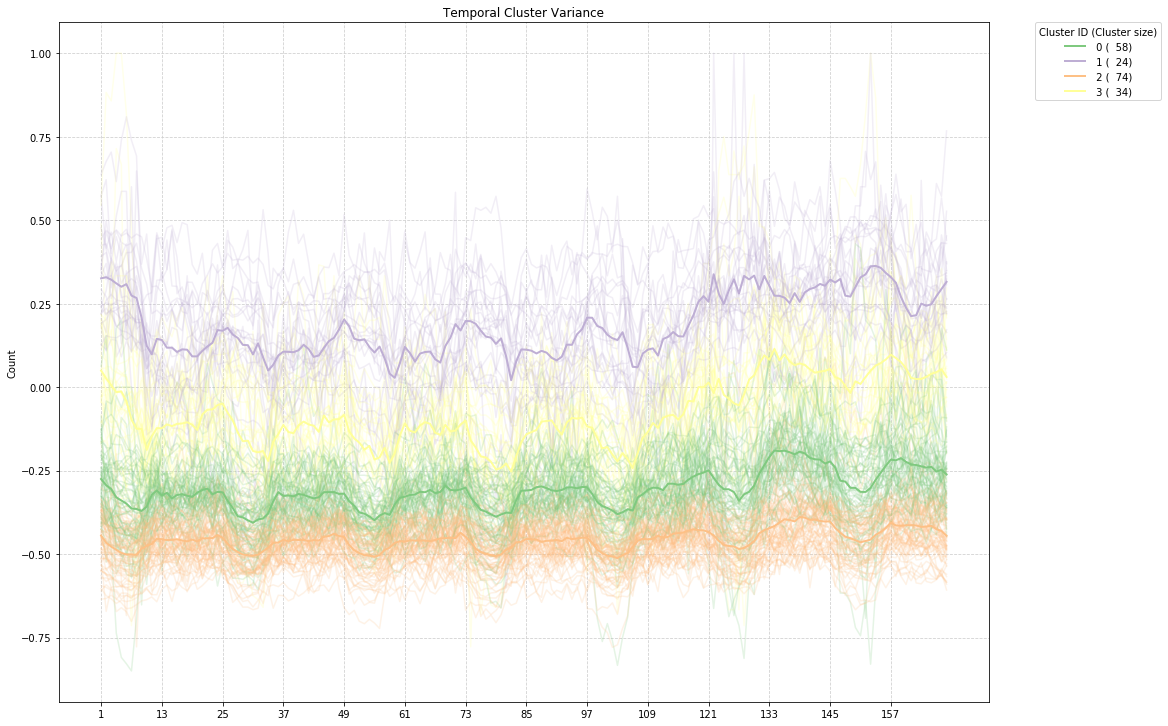

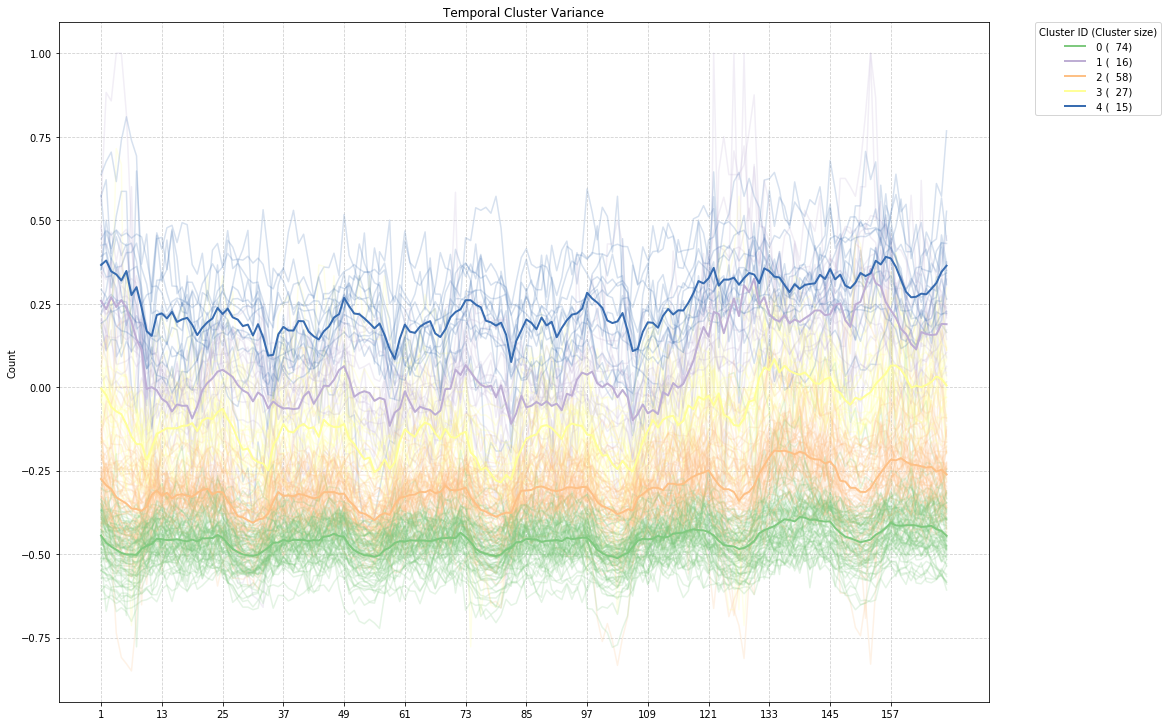

IndexError: list index out of range

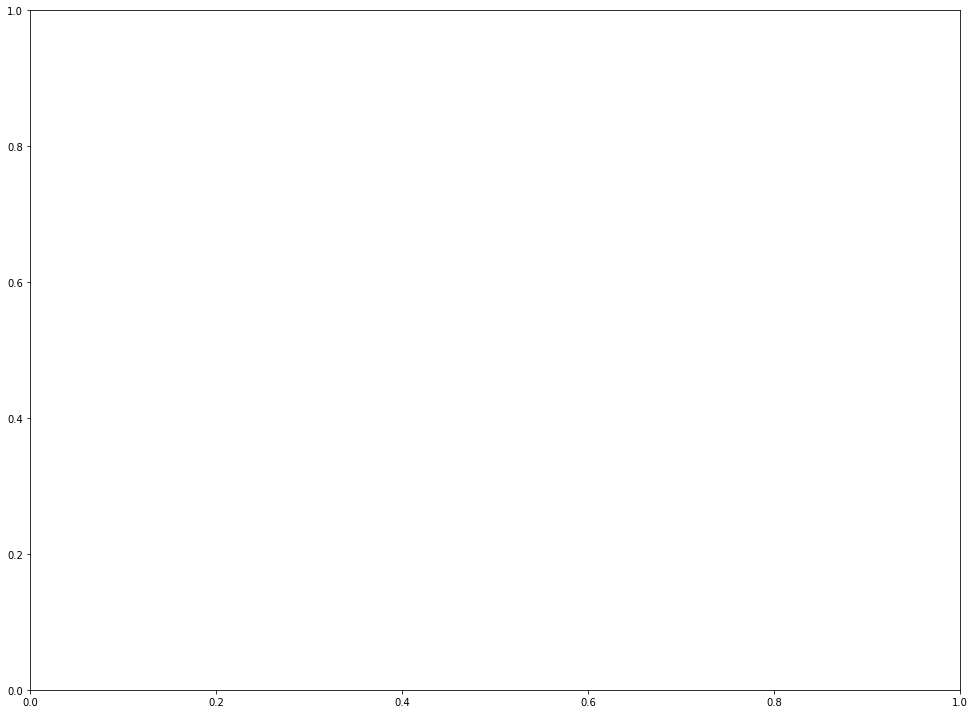

In [258]:
# for k in range(2,13):
# #     print(k)
# #     clust_id_col_name = 'Cluster ID (k={})'.format(k)
#     comparison = comparison.drop([clust_id_col_name], axis=1)
#     (comparison_clustered, comparison_centroids, comparison_cluster_sizes) = clusterize(comparison)
#     plot_clusters(comparison_clustered, comparison_centroids, comparison_cluster_sizes)
    